# Part 1:

# Data preparation (Data Cleaning and Data Preprocessing) 

# Step 1:

import original CSV file from https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import pandas as pd
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",header='infer')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
100753,2021-06,YISHUN,5 ROOM,820,YISHUN ST 81,01 TO 03,121.0,Improved,1988,66 years 03 months,541000.0
100754,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,01 TO 03,181.0,Apartment,1992,69 years 11 months,868000.0
100755,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,63 years 03 months,585000.0
100756,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,1987,65 years 04 months,600000.0


# Step 2: 
Check for any duplicate data in original dataset

In [2]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 100758
Number of rows after discarding duplicates = 100530


# Step 3: 

i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [3]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 100530
Number of attributes = 11
Number of missing values:
	month: 0
	town: 0
	flat_type: 0
	block: 0
	street_name: 0
	storey_range: 0
	floor_area_sqm: 0
	flat_model: 0
	lease_commence_date: 0
	remaining_lease: 0
	resale_price: 0


# Step 4 : Drop Missing Data if any

In [4]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 100530
Number of rows after discarding missing values = 100530


# Step 5 : Remove non-essential columns : month, block, streen_name, flat_model

In [5]:
dfTrim = df_drop_null.drop(['month','block','street_name','flat_model'],axis=1)
dfTrim

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100753,YISHUN,5 ROOM,01 TO 03,121.0,1988,66 years 03 months,541000.0
100754,YISHUN,EXECUTIVE,01 TO 03,181.0,1992,69 years 11 months,868000.0
100755,YISHUN,EXECUTIVE,01 TO 03,152.0,1985,63 years 03 months,585000.0
100756,YISHUN,EXECUTIVE,01 TO 03,146.0,1987,65 years 04 months,600000.0


# Step 6 : Removing Outliers

In [6]:
#remove values with zscore >3
from scipy import stats

df1 = dfTrim.loc[dfTrim['town']=='ANG MO KIO'].copy()
df1['z_score'] = stats.zscore(df1['resale_price'])
df1 = df1.loc[df1['z_score'].abs()<=3]

df2 = dfTrim.loc[dfTrim['town']=='BEDOK'].copy()
df2['z_score'] = stats.zscore(df2['resale_price'])
df2 = df2.loc[df2['z_score'].abs()<=3]

df3 = dfTrim.loc[dfTrim['town']=='BISHAN'].copy()
df3['z_score'] = stats.zscore(df3['resale_price'])
df3 = df3.loc[df3['z_score'].abs()<=3]

df4 = dfTrim.loc[dfTrim['town']=='BUKIT BATOK'].copy()
df4['z_score'] = stats.zscore(df4['resale_price'])
df4 = df4.loc[df4['z_score'].abs()<=3]

df5 = dfTrim.loc[dfTrim['town']=='BUKIT MERAH'].copy()
df5['z_score'] = stats.zscore(df5['resale_price'])
df5 = df5.loc[df5['z_score'].abs()<=3]

df6 = dfTrim.loc[dfTrim['town']=='BUKIT PANJANG'].copy()
df6['z_score'] = stats.zscore(df6['resale_price'])
df6 = df6.loc[df6['z_score'].abs()<=3]

df7 = dfTrim.loc[dfTrim['town']=='BUKIT TIMAH'].copy()
df7['z_score'] = stats.zscore(df7['resale_price'])
df7 = df7.loc[df7['z_score'].abs()<=3]

df8 = dfTrim.loc[dfTrim['town']=='CENTRAL AREA'].copy()
df8['z_score'] = stats.zscore(df8['resale_price'])
df8 = df8.loc[df8['z_score'].abs()<=3]

df9 = dfTrim.loc[dfTrim['town']=='CLEMENTI'].copy()
df9['z_score'] = stats.zscore(df9['resale_price'])
df9 = df9.loc[df9['z_score'].abs()<=3]

df10 = dfTrim.loc[dfTrim['town']=='GEYLANG'].copy()
df10['z_score'] = stats.zscore(df10['resale_price'])
df10 = df10.loc[df10['z_score'].abs()<=3]

df11 = dfTrim.loc[dfTrim['town']=='HOUGANG'].copy()
df11['z_score'] = stats.zscore(df11['resale_price'])
df11 = df11.loc[df11['z_score'].abs()<=3]

df12 = dfTrim.loc[dfTrim['town']=='JURONG EAST'].copy()
df12['z_score'] = stats.zscore(df12['resale_price'])
df12 = df12.loc[df12['z_score'].abs()<=3]

df13 = dfTrim.loc[dfTrim['town']=='JURONG WEST'].copy()
df13['z_score'] = stats.zscore(df13['resale_price'])
df13 = df13.loc[df13['z_score'].abs()<=3]

df14 = dfTrim.loc[dfTrim['town']=='KALLANG/WHAMPOA'].copy()
df14['z_score'] = stats.zscore(df14['resale_price'])
df14 = df14.loc[df14['z_score'].abs()<=3]

df15 = dfTrim.loc[dfTrim['town']=='MARINE PARADE'].copy()
df15['z_score'] = stats.zscore(df15['resale_price'])
df15 = df15.loc[df15['z_score'].abs()<=3]

df16 = dfTrim.loc[dfTrim['town']=='PASIR RIS'].copy()
df16['z_score'] = stats.zscore(df16['resale_price'])
df16 = df16.loc[df16['z_score'].abs()<=3]

df17 = dfTrim.loc[dfTrim['town']=='PUNGGOL'].copy()
df17['z_score'] = stats.zscore(df17['resale_price'])
df17 = df17.loc[df17['z_score'].abs()<=3]

df18 = dfTrim.loc[dfTrim['town']=='QUEENSTOWN'].copy()
df18['z_score'] = stats.zscore(df18['resale_price'])
df18 = df18.loc[df18['z_score'].abs()<=3]

df19 = dfTrim.loc[dfTrim['town']=='SEMBAWANG'].copy()
df19['z_score'] = stats.zscore(df19['resale_price'])
df19 = df19.loc[df19['z_score'].abs()<=3]

df20 = dfTrim.loc[dfTrim['town']=='SENGKANG'].copy()
df20['z_score'] = stats.zscore(df20['resale_price'])
df20 = df20.loc[df20['z_score'].abs()<=3]

df21 = dfTrim.loc[dfTrim['town']=='SERANGOON'].copy()
df21['z_score'] = stats.zscore(df21['resale_price'])
df21 = df21.loc[df21['z_score'].abs()<=3]

df22 = dfTrim.loc[dfTrim['town']=='TAMPINES'].copy()
df22['z_score'] = stats.zscore(df22['resale_price'])
df22 = df22.loc[df22['z_score'].abs()<=3]

df23 = dfTrim.loc[dfTrim['town']=='TOA PAYOH'].copy()
df23['z_score'] = stats.zscore(df23['resale_price'])
df23 = df23.loc[df23['z_score'].abs()<=3]

df24 = dfTrim.loc[dfTrim['town']=='WOODLANDS'].copy()
df24['z_score'] = stats.zscore(df24['resale_price'])
df24 = df24.loc[df24['z_score'].abs()<=3]

df25 = dfTrim.loc[dfTrim['town']=='YISHUN'].copy()
df25['z_score'] = stats.zscore(df25['resale_price'])
df25 = df25.loc[df25['z_score'].abs()<=3]

df26 = dfTrim.loc[dfTrim['town']=='CHOA CHU KANG'].copy()
df26['z_score'] = stats.zscore(df26['resale_price'])
df26 = df26.loc[df26['z_score'].abs()<=3]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, 
          df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26]

dfRemoveDup = pd.concat(frames)
dfRemoveDup = dfRemoveDup.drop(columns=['z_score'])
dfRemoveDup.town.unique()

#dfTrim['z_score']=stats.zscore(dfTrim['resale_price'])
#dfRemoveDup = dfTrim.loc[dfTrim['z_score'].abs()<=3]

#can export step6 as cleandataset, as step7 will be classifying and editing data

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'CHOA CHU KANG'], dtype=object)

# Step 7 : Classifying 'town' and 'flat_type' into integers

In [7]:
#north=1, northeast=2, central=3, northwest=4, west=5, east=6
replace_town = {'HOUGANG':2, 'WOODLANDS':1, 'BUKIT MERAH':3, 'SENGKANG':2, 
                'CHOA CHU KANG':4, 'JURONG WEST':5, 'BEDOK':6, 'TAMPINES':6, 
                'KALLANG/WHAMPOA':3, 'GEYLANG':3, 'YISHUN':1, 'SERANGOON':2, 
                'QUEENSTOWN':3, 'BISHAN':3, 'PUNGGOL':2, 'ANG MO KIO':2, 
                'TOA PAYOH':3, 'BUKIT BATOK':5, 'CENTRAL AREA':3, 'SEMBAWANG':1, 
                'JURONG EAST':5, 'CLEMENTI':5, 'MARINE PARADE':3, 'PASIR RIS':6, 
                'BUKIT PANJANG':5, 'BUKIT TIMAH':3}

#1room=1, 2room=2, 3room=3, 4room=4, 5room=5, executive=6, multigen=7
replace_ft = {'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, 
              '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7}

dfRemoveDup['town'] = dfRemoveDup['town'].map(replace_town)
dfRemoveDup['flat_type'] = dfRemoveDup['flat_type'].map(replace_ft)

dfClassified = dfRemoveDup.copy()
dfClassified = dfClassified.reset_index()
del dfClassified['index']

dfClassified

#dfRemoveDup['resale_price'] = pd.cut(dfRemoveDup.resale_price, 
#                                     bins=[0,250000,260000,270000,280000,290000,300000,
#                                           310000,320000,330000,340000,350000,360000,370000,380000,390000,400000,
#                                           410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,
#                                           510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,
#                                           610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,np.inf],
#                                     labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
#                                             26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])


,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0


# Step 8: create labels using 'resale_price' and 'flat_type'

In [8]:
label = []
for row in dfClassified.index:
    if (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==1):
        label.append(1)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==2):
        label.append(2)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==3):
        label.append(3)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==4):
        label.append(4)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==5):
        label.append(5)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==6):
        label.append(6)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==7):
        label.append(7)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==1):
        label.append(8)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==2):
        label.append(9)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==3):
        label.append(10)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==4):
        label.append(11)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==5):
        label.append(12)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==6):
        label.append(13)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==7):
        label.append(14)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==1):
        label.append(15)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==2):
        label.append(16)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==3):
        label.append(17)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==4):
        label.append(18)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==5):
        label.append(19)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==6):
        label.append(20)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==7):
        label.append(21)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==1):
        label.append(22)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==2):
        label.append(23)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==3):
        label.append(24)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==4):
        label.append(25)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==5):
        label.append(26)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==6):
        label.append(27)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==7):
        label.append(28)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==1):
        label.append(29)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==2):
        label.append(30)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==3):
        label.append(31)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==4):
        label.append(32)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==5):
        label.append(33)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==6):
        label.append(34)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==7):
        label.append(35)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==1):
        label.append(36)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==2):
        label.append(37)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==3):
        label.append(38)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==4):
        label.append(39)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==5):
        label.append(40)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==6):
        label.append(41)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==7):
        label.append(42)
    else:
        label.append('rip')

dfClassified['label'] = label
dfClassified


,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,label
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0,9
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0,10
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0,17
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0,17
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0,17
...,...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0,41
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0,34
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0,41
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0,41


# Step 9: Split data into features (X) and Class Label (Y) using numpy

In [9]:
from sklearn import preprocessing

X=dfClassified[['floor_area_sqm', 'resale_price','flat_type']].to_numpy()
standard = preprocessing.StandardScaler().fit(X)
standardized = standard.transform(X)
print(standardized)

Y=dfClassified[['label']].to_numpy()
Y=Y.reshape(-1)
print(Y)

[[-2.23841625 -1.39631492 -2.32343888]
 [-1.2773867  -1.28017658 -1.23776904]
 [-1.2773867  -1.20275102 -1.23776904]
 ...
 [ 2.02354088  1.15872852  2.01924049]
 [ 2.02354088  1.23615408  2.01924049]
 [ 2.02354088  1.07485083  2.01924049]]
[ 9 10 17 ... 41 41 41]


# Step 10: Data Visualization of input features and label in 2 Dimension

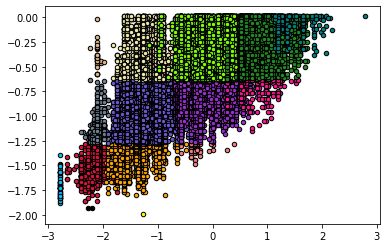

In [10]:
import matplotlib.pyplot as plt

reds = Y == 1
black = Y == 2
yellow = Y == 3
blue = Y == 4
aqua = Y == 5
magenta = Y == 6
brown = Y == 7
deepskyblue = Y == 8
crimson = Y == 9
orange = Y == 10

lightcoral = Y == 11
silver = Y == 12
chocolate = Y == 13
mediumseagreen = Y == 14
powderblue = Y == 15
slategrey = Y == 16
slateblue = Y == 17
darkorchid = Y == 18
deeppink = Y == 19
lavenderblush = Y == 20

maroon = Y == 21
saddlebrown = Y == 22
burlywood = Y == 23
palegoldenrod = Y == 24
chartreuse = Y == 25
forestgreen = Y == 26
teal = Y == 27

plt.scatter(standardized[reds, 0], standardized[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(standardized[black, 0], standardized[black, 1], c="black", s=20, edgecolor='k')
plt.scatter(standardized[yellow, 0], standardized[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(standardized[blue, 0], standardized[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(standardized[aqua, 0], standardized[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(standardized[magenta, 0], standardized[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(standardized[brown, 0], standardized[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(standardized[deepskyblue, 0], standardized[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(standardized[crimson, 0], standardized[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(standardized[orange, 0], standardized[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(standardized[lightcoral, 0], standardized[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(standardized[silver, 0], standardized[silver, 1], c="silver", s=20, edgecolor='k')
plt.scatter(standardized[chocolate, 0], standardized[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(standardized[mediumseagreen, 0], standardized[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(standardized[powderblue, 0], standardized[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(standardized[slategrey, 0], standardized[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(standardized[slateblue, 0], standardized[slateblue, 1], c="slateblue",s=20, edgecolor='k')
plt.scatter(standardized[darkorchid, 0], standardized[darkorchid, 1], c="darkorchid", s=20, edgecolor='k')
plt.scatter(standardized[deeppink, 0], standardized[deeppink, 1], c="deeppink",s=20, edgecolor='k')
plt.scatter(standardized[lavenderblush, 0], standardized[lavenderblush, 1], c="lavenderblush", s=20, edgecolor='k')

plt.scatter(standardized[maroon, 0], standardized[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(standardized[saddlebrown, 0], standardized[saddlebrown, 1], c="saddlebrown", s=20, edgecolor='k')
plt.scatter(standardized[burlywood, 0], standardized[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(standardized[palegoldenrod, 0], standardized[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(standardized[chartreuse, 0], standardized[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(standardized[forestgreen, 0], standardized[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(standardized[teal, 0], standardized[teal, 1], c="teal",s=20, edgecolor='k')


# Step 11: Perform PCA EigenDecomposition

In [11]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(standardized)
print(standardized)

[[-2.23841625 -1.39631492 -2.32343888]
 [-1.2773867  -1.28017658 -1.23776904]
 [-1.2773867  -1.20275102 -1.23776904]
 ...
 [ 2.02354088  1.15872852  2.01924049]
 [ 2.02354088  1.23615408  2.01924049]
 [ 2.02354088  1.07485083  2.01924049]]


# Step 12: Determine how many eigenvectors to use

[0.82795631 0.15625291 0.01579078]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

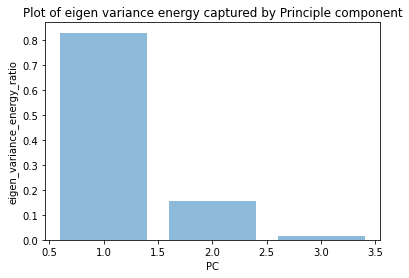

In [12]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.bar(range(1,4), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

# Step 13: Dimension Reduction using k no of PCs

In [13]:
pca_2 = PCA(n_components=2)
pca_2.fit(standardized)
X_pca_2=pca_2.transform(standardized)
print(X_pca_2)
print(X_pca_2.shape) #2 PC used

[[-3.48506893  0.45719661]
 [-2.18341237 -0.18459617]
 [-2.14365377 -0.11817162]
 ...
 [ 3.04799275 -0.47375293]
 [ 3.08775135 -0.40732838]
 [ 3.00492093 -0.54571286]]
(100102, 2)


# Step 14: Plot reduce dimension data using PCA

Text(0.5, 1.0, 'Projection of Data in Eigenspace')

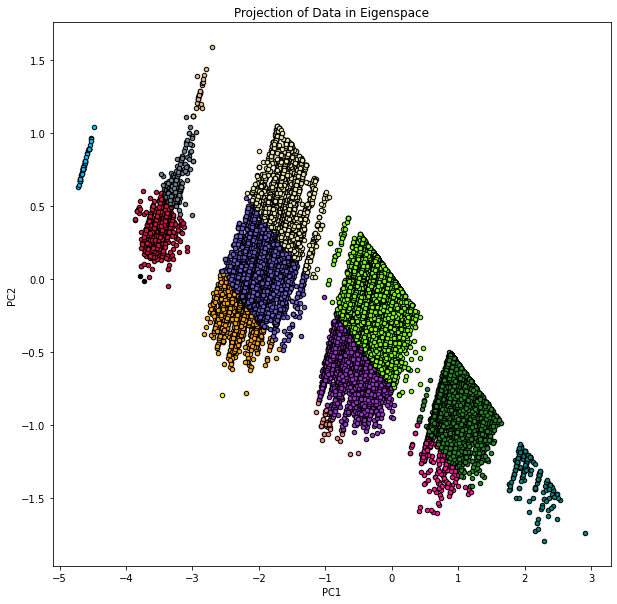

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca_2[reds, 0], X_pca_2[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2[black, 0], X_pca_2[black, 1], c="black",s=20, edgecolor='k')
plt.scatter(X_pca_2[yellow, 0], X_pca_2[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(X_pca_2[blue, 0], X_pca_2[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(X_pca_2[aqua, 0], X_pca_2[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(X_pca_2[magenta, 0], X_pca_2[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(X_pca_2[brown, 0], X_pca_2[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(X_pca_2[deepskyblue, 0], X_pca_2[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(X_pca_2[crimson, 0], X_pca_2[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(X_pca_2[orange, 0], X_pca_2[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(X_pca_2[lightcoral, 0], X_pca_2[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(X_pca_2[silver, 0], X_pca_2[silver, 1], c="silver",s=20, edgecolor='k')
plt.scatter(X_pca_2[chocolate, 0], X_pca_2[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(X_pca_2[mediumseagreen, 0], X_pca_2[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(X_pca_2[powderblue, 0], X_pca_2[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(X_pca_2[slategrey, 0], X_pca_2[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(X_pca_2[slateblue, 0], X_pca_2[slateblue, 1], c="slateblue", s=20, edgecolor='k')
plt.scatter(X_pca_2[darkorchid, 0], X_pca_2[darkorchid, 1], c="darkorchid",s=20, edgecolor='k')
plt.scatter(X_pca_2[deeppink, 0], X_pca_2[deeppink, 1], c="deeppink", s=20, edgecolor='k')
plt.scatter(X_pca_2[lavenderblush, 0], X_pca_2[lavenderblush, 1], c="lavenderblush",s=20, edgecolor='k')

plt.scatter(X_pca_2[maroon, 0], X_pca_2[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(X_pca_2[saddlebrown, 0], X_pca_2[saddlebrown, 1], c="saddlebrown",s=20, edgecolor='k')
plt.scatter(X_pca_2[burlywood, 0], X_pca_2[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(X_pca_2[palegoldenrod, 0], X_pca_2[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(X_pca_2[chartreuse, 0], X_pca_2[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(X_pca_2[forestgreen, 0], X_pca_2[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(X_pca_2[teal, 0], X_pca_2[teal, 1], c="teal",s=20, edgecolor='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

# Step 15: Transform data back to verify

In [15]:
X_pca_2_back=pca_2.inverse_transform(X_pca_2)
print(X_pca_2_back)

[[-2.28185862 -1.39737309 -2.27929899]
 [-1.25233637 -1.2795664  -1.26322158]
 [-1.25326405 -1.20216344 -1.26227901]
 ...
 [ 2.02349002  1.15872728  2.01929217]
 [ 2.02256234  1.23613025  2.02023474]
 [ 2.02449501  1.07487408  2.01827104]]


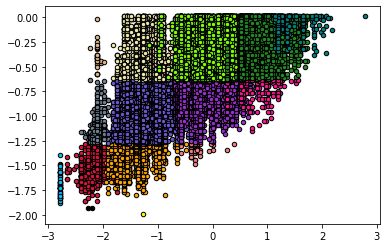

In [16]:
plt.scatter(standardized[reds, 0], standardized[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(standardized[black, 0], standardized[black, 1], c="black", s=20, edgecolor='k')
plt.scatter(standardized[yellow, 0], standardized[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(standardized[blue, 0], standardized[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(standardized[aqua, 0], standardized[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(standardized[magenta, 0], standardized[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(standardized[brown, 0], standardized[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(standardized[deepskyblue, 0], standardized[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(standardized[crimson, 0], standardized[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(standardized[orange, 0], standardized[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(standardized[lightcoral, 0], standardized[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(standardized[silver, 0], standardized[silver, 1], c="silver", s=20, edgecolor='k')
plt.scatter(standardized[chocolate, 0], standardized[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(standardized[mediumseagreen, 0], standardized[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(standardized[powderblue, 0], standardized[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(standardized[slategrey, 0], standardized[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(standardized[slateblue, 0], standardized[slateblue, 1], c="slateblue",s=20, edgecolor='k')
plt.scatter(standardized[darkorchid, 0], standardized[darkorchid, 1], c="darkorchid", s=20, edgecolor='k')
plt.scatter(standardized[deeppink, 0], standardized[deeppink, 1], c="deeppink",s=20, edgecolor='k')
plt.scatter(standardized[lavenderblush, 0], standardized[lavenderblush, 1], c="lavenderblush", s=20, edgecolor='k')

plt.scatter(standardized[maroon, 0], standardized[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(standardized[saddlebrown, 0], standardized[saddlebrown, 1], c="saddlebrown", s=20, edgecolor='k')
plt.scatter(standardized[burlywood, 0], standardized[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(standardized[palegoldenrod, 0], standardized[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(standardized[chartreuse, 0], standardized[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(standardized[forestgreen, 0], standardized[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(standardized[teal, 0], standardized[teal, 1], c="teal",s=20, edgecolor='k')

# Part 2: 

# Data Mining Algorithm

Prediction model : KNN & Decision Tree

# Find the knee point and maxdepth

# Step 16: Create training and testing dataset from the Principle Component Data data based on 70,30 split

In [17]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

# Step 17: Test the performance of KNN and determine the best value of K to choose. Use Euclidean distance

Text(0, 0.5, 'Accuracy')

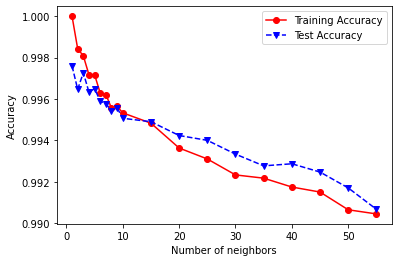

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

numNeighbors = [1,2,3,4,5,6,7,8,9,10, 15, 20, 25, 30,35,40,45,50,55]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clfKNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clfKNN.fit(X_train, Y_train)
    Y_predTrain = clfKNN.predict(X_train)
    Y_predTest = clfKNN.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Step 18: Test the performance of Decison Tree Classifier and determine the optimal max_depth

Text(0, 0.5, 'Accuracy')

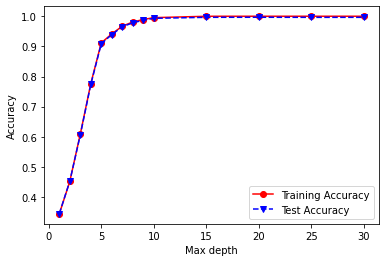

In [19]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################
from sklearn.tree import DecisionTreeClassifier
maxdepths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]  # 14 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clfDT = tree.DecisionTreeClassifier(max_depth=depth)
    clfDT = clfDT.fit(X_train, Y_train)
    Y_predTrain = clfDT.predict(X_train)
    Y_predTest = clfDT.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Part 3:

# Data Visualization

# Step 19: perform KNN prediction using n = 1

In [20]:
from sklearn.neighbors import KNeighborsClassifier
#combinig into single listof tuples
features=list(zip(dfClassified['floor_area_sqm'], dfClassified['resale_price'], dfClassified['flat_type']))

model = KNeighborsClassifier(n_neighbors=1)
model.fit(features,label)

user_choice_area = 150
user_choice_price = 600000
user_choice_flat = 6

#Predict Output
#4,3,230000 -> town=4, flat_type=3, resale_price=230000
# Bernie testing 4,3,5,300000 -> town=4, flat_type=3, resale_price=230000, number_of_people = 5
predicted= model.predict([[user_choice_area,user_choice_price,user_choice_flat]])
print('Predicted label:', predicted)

Predicted label: [41]


# Step 20: perform KNN Recommendation and recommend hdb based on "value"
where value = resale_price / remaining year

In [21]:
dfResult = dfClassified.loc[dfClassified['label'] == predicted[0]]

value = []
for i in dfResult.index:
    text = dfResult['remaining_lease'][i]
    head, sep, tail = text.partition(' ')
    price = dfResult['resale_price'][i]
    
    value.append(float(price) / float(head))
    
dfResult.insert(8, "value_of_house", value, True)
dfResult.sort_values(by=['value_of_house']).head()

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,label,value_of_house
50067,2,6,07 TO 09,128.0,2004,86 years,552500.0,41,6424.418605
50068,2,6,07 TO 09,128.0,2004,86 years,560000.0,41,6511.627907
50399,2,6,10 TO 12,128.0,2004,85 years 09 months,555000.0,41,6529.411765
50398,2,6,10 TO 12,128.0,2004,85 years 09 months,555000.0,41,6529.411765
51351,2,6,07 TO 09,128.0,2004,85 years 01 month,555888.0,41,6539.858824


# Step 21: train Decision Tree prediction

In [22]:
from sklearn import tree

Y = dfClassified['label']
X = dfClassified.drop(['town','storey_range','lease_commence_date','remaining_lease','label'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf = clf.fit(X, Y)

# Step 22: Plot decision tree

[Text(801.6996951219512, 1019.25, 'resale_price <= 450004.0\nentropy = 3.542\nsamples = 100102\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296\n30, 3474, 19075, 8137, 178, 2, 762, 7825, 8142, 1950\n467, 6178, 8660, 5682, 23]\nclass = '),
 Text(514.6189024390244, 883.35, 'resale_price <= 350044.0\nentropy = 2.532\nsamples = 60411\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296\n30, 3474, 19075, 8137, 178, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]\nclass = '),
 Text(348.75, 747.45, 'flat_type <= 3.5\nentropy = 1.731\nsamples = 29517\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass =  '),
 Text(221.15853658536585, 611.55, 'resale_price <= 250044.0\nentropy = 1.101\nsamples = 20557\nvalue = [2, 1, 47, 1127, 3575, 0, 353, 15452, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass =  '),
 Text(136.09756097560975, 475.65, 'flat_type <= 2.5\nentropy = 0.874\nsamples = 4752\nvalue = [2, 1, 47, 1127, 3575, 0, 0, 0, 0, 0,

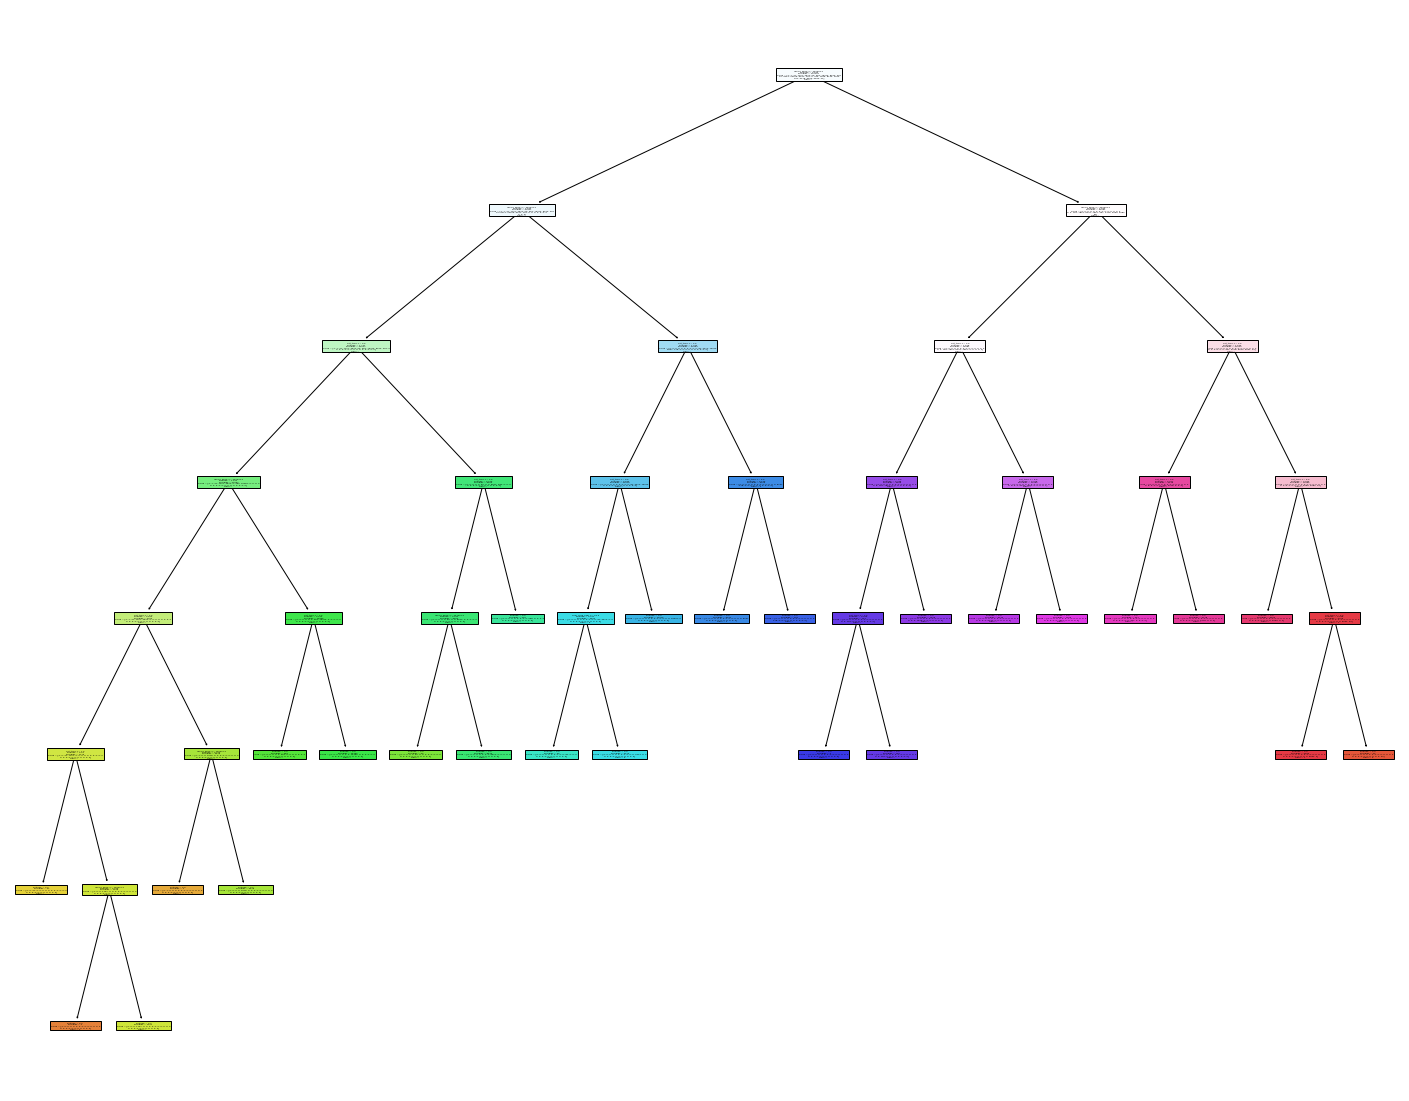

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=str(Y),filled=True, impurity=True)


# Step 23: Test decision tree and predict label

__Create user input data__

In [24]:
# user_choice_area = 150
# user_choice_price = 600000
# user_choice_flat = 6

DTTraining = dfClassified.drop(['town','storey_range','lease_commence_date','remaining_lease'],axis=1)
predicted_DT_label = 41
testData = [[user_choice_flat,user_choice_area,user_choice_price,predicted_DT_label]]
testData = pd.DataFrame(testData, columns=DTTraining.columns)
testData


,flat_type,floor_area_sqm,resale_price,label
0,6,150,600000,41


# Step 24: perform Decision Tree Recommendation

In [25]:
testY = testData['label']
testX = testData.drop(['label'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,flat_type,floor_area_sqm,resale_price,label,Predicted Class
0,6,150,600000,41,41


# Step 25: list top 5 recommended hdb based on "value"

In [26]:
dfResult = dfClassified.loc[dfClassified['label'] == predY[0]]

value = []
for i in dfResult.index:
    text = dfResult['remaining_lease'][i]
    head, sep, tail = text.partition(' ')
    price = dfResult['resale_price'][i]
    
    value.append(float(price) / float(head))
    
dfResult.insert(8, "value_of_house", value, True)
dfResult.sort_values(by=['value_of_house']).head()

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,label,value_of_house
50067,2,6,07 TO 09,128.0,2004,86 years,552500.0,41,6424.418605
50068,2,6,07 TO 09,128.0,2004,86 years,560000.0,41,6511.627907
50399,2,6,10 TO 12,128.0,2004,85 years 09 months,555000.0,41,6529.411765
50398,2,6,10 TO 12,128.0,2004,85 years 09 months,555000.0,41,6529.411765
51351,2,6,07 TO 09,128.0,2004,85 years 01 month,555888.0,41,6539.858824


# Part 4 : Data Analysis

# Step 26: 
__perform Confusion Matrix for KNN__

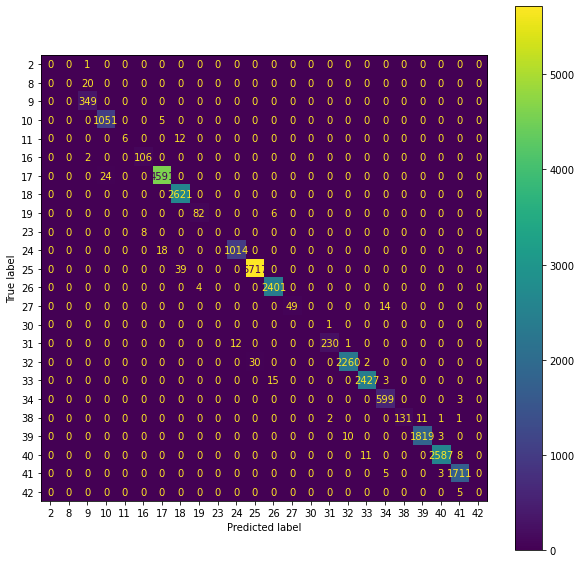

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
metrics.plot_confusion_matrix(clfKNN, X_test, Y_test, ax=ax)

# Step 27: 
__Confusion Matrix for Decision Tree__

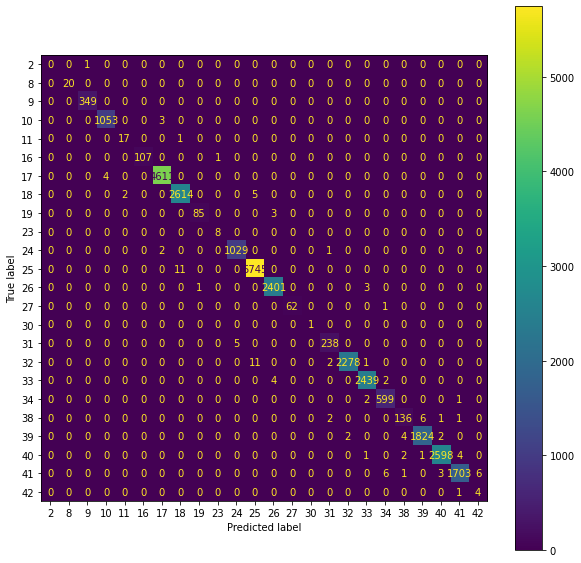

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(clfDT, X_test, Y_test, ax=ax)

# Future works

# Supervised: Predict based on number_of_people in household?
Add new column number_of_people.
assume max number of people for a given flat_type = n + 1 , executive and multigen = 7
1 room = 2 people, 2 room = 3 people, 3room = 4 people, 4room = 5 people, 5room = 6 people, executive = 7, multigen=7

In [45]:
dfFutureWorks_Supervised = dfClassified.copy()
number_of_people = []
for row in dfFutureWorks_Supervised.index:
    if dfFutureWorks_Supervised['flat_type'][row] == 1 :
        number_of_people.append(2)
    elif dfFutureWorks_Supervised['flat_type'][row] == 2 :
        number_of_people.append(3)
    elif dfFutureWorks_Supervised['flat_type'][row] == 3 :
        number_of_people.append(4)
    elif dfFutureWorks_Supervised['flat_type'][row] == 4 :
        number_of_people.append(5)
    elif dfFutureWorks_Supervised['flat_type'][row] == 5 :
        number_of_people.append(6)
    elif dfFutureWorks_Supervised['flat_type'][row] == 6 :
        number_of_people.append(7)
    elif dfFutureWorks_Supervised['flat_type'][row] == 7 :
        number_of_people.append(7)
    else:
        number_of_people.append('rip')
dfFutureWorks_Supervised['number_of_people'] = number_of_people
dfFutureWorks_Supervised

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,label,number_of_people
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0,9,3
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0,10,4
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0,17,4
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0,17,4
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0,17,4
...,...,...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0,41,7
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0,34,7
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0,41,7
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0,41,7


# Unsupervised: Use Kmean Clustering to recommed

In [50]:
dfFutureWorks_Unsupervised = dfRemoveDup.copy()
dfFutureWorks_Unsupervised = dfFutureWorks_Unsupervised.drop(['storey_range','remaining_lease'],axis=1)
dfFutureWorks_Unsupervised

,town,flat_type,floor_area_sqm,lease_commence_date,resale_price
0,2,2,44.0,1979,232000.0
1,2,3,67.0,1978,250000.0
2,2,3,67.0,1980,262000.0
3,2,3,68.0,1980,265000.0
4,2,3,67.0,1980,265000.0
...,...,...,...,...,...
99478,4,6,146.0,1995,655000.0
99479,4,6,148.0,1995,480000.0
99480,4,6,146.0,1996,628000.0
99481,4,6,146.0,1989,640000.0


In [52]:
Future_Unsupervised_standard = preprocessing.StandardScaler().fit(dfFutureWorks_Unsupervised)
Future_Unsupervised_standardized = Future_Unsupervised_standard.transform(dfFutureWorks_Unsupervised)
print(Future_Unsupervised_standardized)

[[-0.74850159 -2.32343888 -2.23841625 -1.18591866 -1.39631492]
 [-0.74850159 -1.23776904 -1.2773867  -1.26154676 -1.28017658]
 [-0.74850159 -1.23776904 -1.2773867  -1.11029055 -1.20275102]
 ...
 [ 0.40727224  2.01924049  2.02354088  0.09975911  1.15872852]
 [ 0.40727224  2.01924049  2.02354088 -0.42963762  1.23615408]
 [ 0.40727224  2.01924049  2.02354088 -0.42963762  1.07485083]]


In [53]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(Future_Unsupervised_standardized)
print(Future_Unsupervised_standardized)

[[-0.74850159 -2.32343888 -2.23841625 -1.18591866 -1.39631492]
 [-0.74850159 -1.23776904 -1.2773867  -1.26154676 -1.28017658]
 [-0.74850159 -1.23776904 -1.2773867  -1.11029055 -1.20275102]
 ...
 [ 0.40727224  2.01924049  2.02354088  0.09975911  1.15872852]
 [ 0.40727224  2.01924049  2.02354088 -0.42963762  1.23615408]
 [ 0.40727224  2.01924049  2.02354088 -0.42963762  1.07485083]]


[0.51871117 0.23595692 0.15433394 0.08205313 0.00894485]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

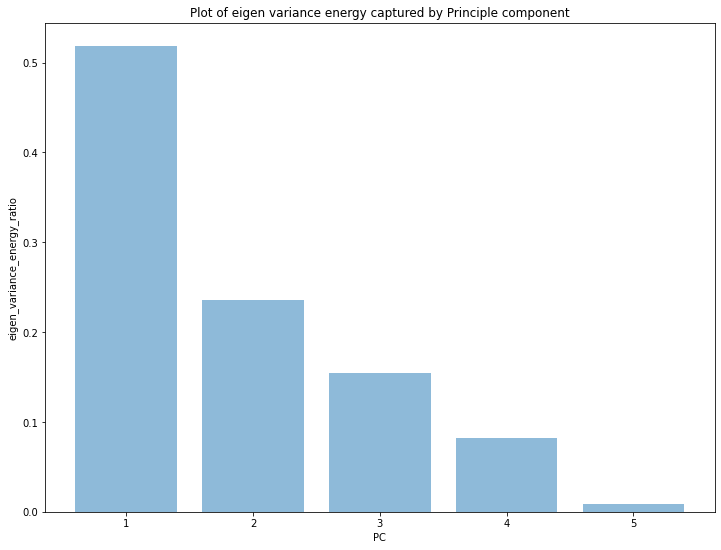

In [54]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.bar(range(1,6), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

In [70]:
Future_Unsupervised_pca_2 = PCA(n_components=2)
pca_2.fit(Future_Unsupervised_standardized)
Future_Unsupervisied_X_pca_2=pca_2.transform(Future_Unsupervised_standardized)
print(Future_Unsupervisied_X_pca_2)
print(Future_Unsupervisied_X_pca_2.shape) #2 PC used

[[-3.67725833 -0.39662391]
 [-2.44807659 -0.09084728]
 [-2.3704057  -0.18606016]
 ...
 [ 2.97387285  0.74961615]
 [ 2.88048292  1.07582221]
 [ 2.79786339  1.07908101]]
(100102, 2)


In [91]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=45, max_iter=50, random_state=1)
k_means.fit(Future_Unsupervisied_X_pca_2)
labels = k_means.labels_
print('labels:', labels)
pd.DataFrame(labels,columns=['Cluster ID'])

labels: [25 12 12 ...  3  3  3]


,Cluster ID
0,25
1,12
2,12
3,12
4,12
...,...
100097,3
100098,3
100099,3
100100,3


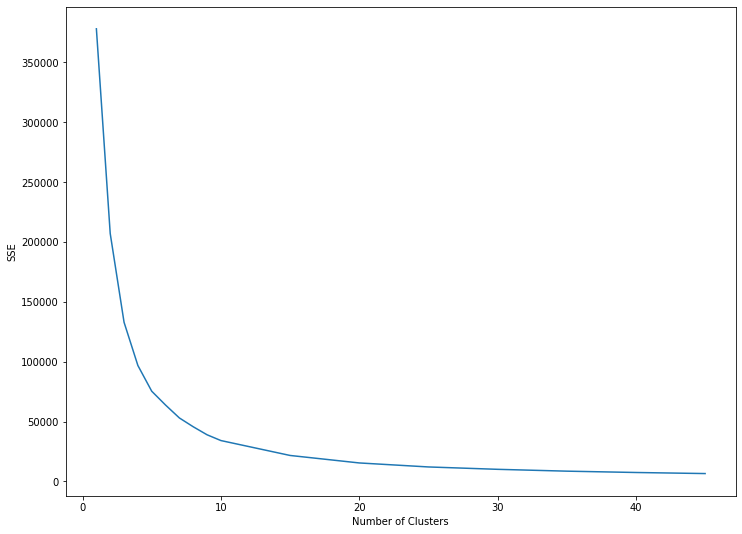

In [94]:
import matplotlib.pyplot as plt

# Make plot outputs appear and be stored within the notebook
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9) # The default value of the figsize parameter is [6.4, 4.8]
numClusters = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45]
#numClusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(Future_Unsupervisied_X_pca_2)
    SSE.append(k_means.inertia_) # Sum of squared distances of samples to their closest cluster center

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(numClusters, SSE)

In [95]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=Future_Unsupervisied_X_pca_2.shape)

,100102,2
0,-2.374953,1.522864
1,0.852369,-0.753995
2,1.060559,0.589137
3,0.201061,-1.501487
4,-2.276734,-0.228460
5,2.112629,0.562554
6,-0.912569,0.807345
7,2.703721,1.717508
8,2.448298,-0.647214
9,-0.646329,-1.336017


In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =45).fit(Future_Unsupervisied_X_pca_2)
centroids = kmeans.cluster_centers_
print(centroids)

[[-7.15272988e-01  1.71803011e+00]
 [ 4.13732350e-01 -1.54712403e+00]
 [-1.65403485e+00  7.35760187e-03]
 [ 1.86060481e+00  6.04636201e-01]
 [ 1.46521965e+00 -2.74992226e-01]
 [-2.64523843e+00  6.48318345e-01]
 [-6.48277465e-01 -1.33688256e+00]
 [ 2.72784716e+00  1.71734297e+00]
 [-7.04397806e-01 -3.81634390e-02]
 [ 2.89476498e+00 -7.50026068e-01]
 [-2.27845631e+00 -2.29123374e-01]
 [-1.83220373e+00  1.41131971e+00]
 [ 9.21702545e-01  1.15515864e+00]
 [-3.30138345e-01 -6.26311146e-01]
 [ 3.70256643e+00  6.97207546e-01]
 [ 1.01546946e+00 -1.07705608e+00]
 [-1.43047313e+00 -1.93494125e+00]
 [ 1.18128996e+00  1.87147655e+00]
 [ 8.57069255e-02 -1.78443725e-01]
 [-2.15972101e-02 -1.96157239e+00]
 [-3.21572547e-01 -1.08520402e+00]
 [-2.93750322e+00 -2.11491997e+00]
 [ 9.73655925e-01 -7.06875014e-01]
 [ 1.00230877e-01  5.28509203e-01]
 [-2.14567377e+00  9.62073706e-01]
 [ 2.27397475e+00 -7.58566438e-01]
 [-4.58682895e-01  1.18548595e+00]
 [ 9.52441296e-02 -1.47583703e+00]
 [-1.13553934e+00 -6

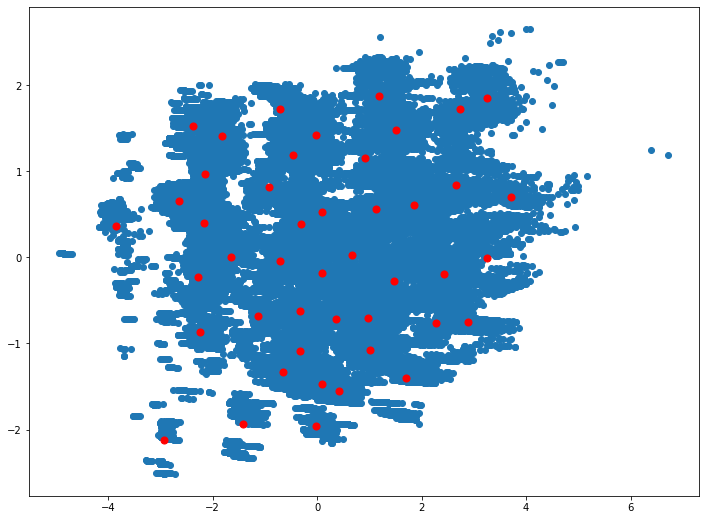

In [98]:
plt.scatter(Future_Unsupervisied_X_pca_2[:,0],Future_Unsupervisied_X_pca_2[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()